In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt



In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
#dataset has two csv files i.e test and train 
# x_train and x_test contain only pixels and y_train y_test contain lables
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
#adding lables
class_names= ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
#cnn would only work on 3d images whereas the dataset has only grayscale images so we would have to reshape them
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))

In [7]:
# rbg channels have values from 0 to 255 so to scale down the values of pixels between 0 to 1 divide them with 255
x_train_n=x_train/255
x_test_n=x_test/255

In [8]:
# splitting x_train into x_valid and and x_train
x_valid,x_train=x_train[:5000], x_train[5000:]
y_valid,y_train=y_train[:5000], y_train[5000:]

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
#using sequential model and adding every layer
model=keras.models.Sequential()
#first layer
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=1,padding="valid",activation="relu",input_shape=(28,28,1)))

model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])


In [13]:
model_history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_valid,y_valid))


Epoch 1/10
860/860 [==============================] - 28s 32ms/step - loss: 5.4056 - accuracy: 0.6646 - val_loss: 0.6861 - val_accuracy: 0.7500
Epoch 2/10
860/860 [==============================] - 26s 30ms/step - loss: 0.4963 - accuracy: 0.8180 - val_loss: 0.4796 - val_accuracy: 0.8180
Epoch 3/10
860/860 [==============================] - 28s 32ms/step - loss: 0.4219 - accuracy: 0.8438 - val_loss: 0.7129 - val_accuracy: 0.7612
Epoch 4/10
860/860 [==============================] - 30s 35ms/step - loss: 0.3804 - accuracy: 0.8573 - val_loss: 0.3853 - val_accuracy: 0.8580
Epoch 5/10
860/860 [==============================] - 29s 34ms/step - loss: 0.3528 - accuracy: 0.8670 - val_loss: 0.3919 - val_accuracy: 0.8604
Epoch 6/10
860/860 [==============================] - 27s 32ms/step - loss: 0.3272 - accuracy: 0.8755 - val_loss: 0.3893 - val_accuracy: 0.8622
Epoch 7/10
860/860 [==============================] - 28s 33ms/step - loss: 0.3109 - accuracy: 0.8823 - val_loss: 0.3740 - val_accuracy:

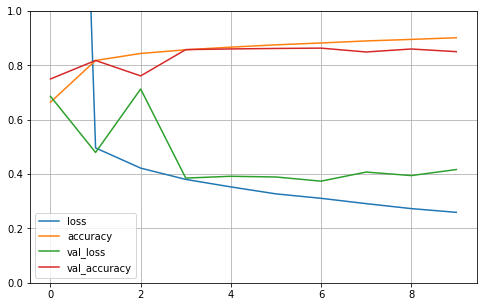

In [14]:
import pandas as pd

pd.DataFrame (model_history.history).plot(figsize=(8, 5))

plt.grid (True)

plt.gca().set_ylim(0, 1)

plt.show()

In [21]:
image = x_train[800,:].reshape((28,28))

<function matplotlib.pyplot.show(close=None, block=None)>

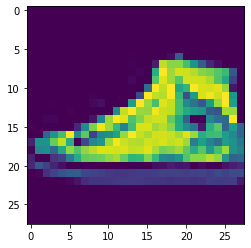

In [22]:
plt.imshow(image)
plt.show

In [23]:
ev = model.evaluate(x_test_n, y_test)


313/313 [==============================] - 2s 7ms/step - loss: 1.4510 - accuracy: 0.5537


In [24]:
ev

[1.4510279893875122, 0.5536999702453613]

In [25]:
x_new =x_test[:3]

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [27]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


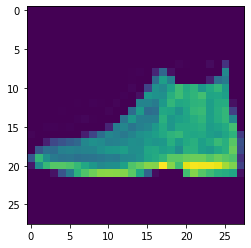

In [31]:
print (plt.imshow (x_test[0].reshape((28,28))))

In [29]:
keras.backend.clear_session

<function keras.backend.clear_session()>

In [30]:
del model